## Pima Indians Diabetes dataset (classification)

* Question: <b>Can we predict the diabetes status</b> of a patient givne their health measurements?
* Data source : Kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* This notebook follows typical <b>OSEMN Pipeline</b>
<ol>
    <li> <b>O</b> - Obtaining data </li>
    <li> <b>S</b> - Scrubbing/Cleaning data </li>
    <li> <b>E</b> - Exploring/Visualizing data -> find patterns and trends </li>
    <li> <b>M</b> - Modeling  data -> for predictive analysis </li>
    <li> <b>N</b> - iNterpreting data </li>
</ol>


## 1. Obtaining our data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load in pima-indians-diabetes data
diabetes_df = pd.read_csv("diabetes.csv")
#print the first 5 rows
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Column explanations

* <b>Pregnancies</b> : Number of times pregnant
* <b>Glucose</b> : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* <b>BloodPressure</b> : Diastolic blood pressure (mm Hg)
* <b>SkinThickness</b> : Triceps skin fold thickness (mm)
* <b>Insulin</b> : 2-Hour serum insulin (mu U/ml)
* <b>BMI</b> : Body mass index (weight in kg/(height in m)^2)
* <b>DiabetesPedigreeFunction</b> : Diabetes pedigree function
* <b>Outcome</b> : Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 2. Scrubbing/Cleaning data

### Basic EDA and statistical analysis

In [3]:
diabetes_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


one can remark 0 values(on min column) which is unvalid for Glucose, BloodPressure, SkinThickness, etc.
<br/>-> they need to be replaced (with median value in this case)

In [5]:
#replace zeros with np.NaN in order to use fillna function later
diabetes_df2 = diabetes_df.copy(deep=True)
diabetes_df2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = diabetes_df2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.NaN)

# check the count of NaNs
print(diabetes_df2.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


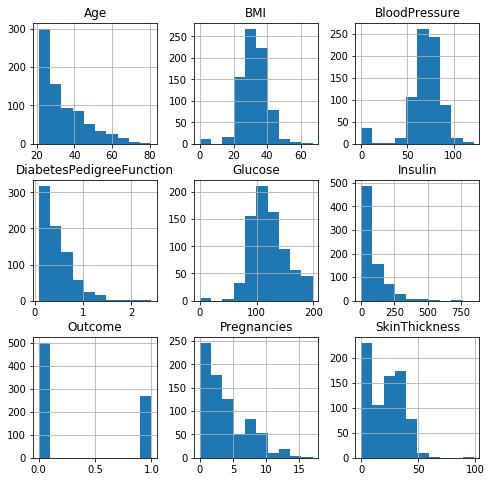

In [6]:
# check distributions of each column
p = diabetes_df.hist(figsize=(8,8))

In [7]:
#replace NaN value with median value
diabetes_df2['Glucose'].fillna(diabetes_df2['Glucose'].mean(), inplace=True)
diabetes_df2['BloodPressure'].fillna(diabetes_df2['BloodPressure'].mean(), inplace=True)
diabetes_df2['SkinThickness'].fillna(diabetes_df2['SkinThickness'].mean(), inplace=True)
diabetes_df2['Insulin'].fillna(diabetes_df2['Insulin'].mean(), inplace=True)
diabetes_df2['BMI'].fillna(diabetes_df2['BMI'].mean(), inplace=True)

### Check distributions of columns after replacing NaN value with median value

* <b>diabetes_df</b>: original dataframe
* <b>diabetes_df2</b>: replaced NaN values with median values

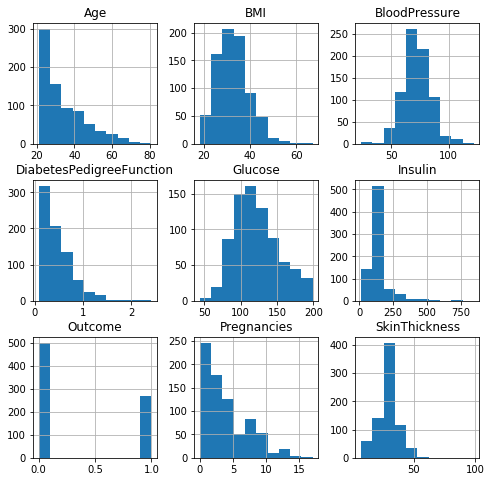

In [8]:
p = diabetes_df2.hist(figsize=(8,8))

### check data types

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


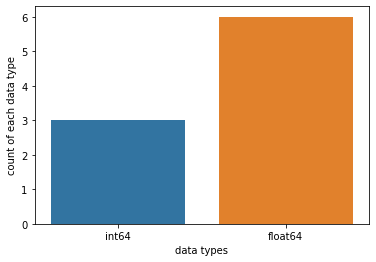

In [9]:
print(diabetes_df2.dtypes)

#let's make a graph too
sns.countplot(diabetes_df2.dtypes.map(str))
plt.ylabel("count of each data type")
plt.xlabel("data types")
plt.show()

### check proportion of outcomes (which are categorical, either 0 or 1)

0    500
1    268
Name: Outcome, dtype: int64


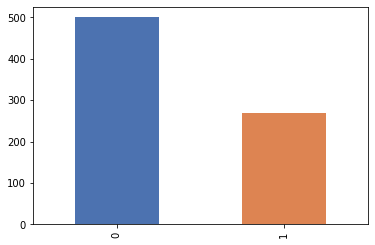

In [10]:
print(diabetes_df2.Outcome.value_counts())

#let's make a graph too
p = diabetes_df2["Outcome"].value_counts().plot(kind="bar", color=['#4c72b0','#dd8452'])

the data is biased towards datapoints having outcome value 0 (not having diabetes)

### Heapmap for Pearson's Correlation Coefficient

* <b>Pearson's Correlation Coefficient</b>: between -1 and 1, it shows the relationship between two columns
* <b>seaborn</b> provides simple <b>heatmap()</b> function

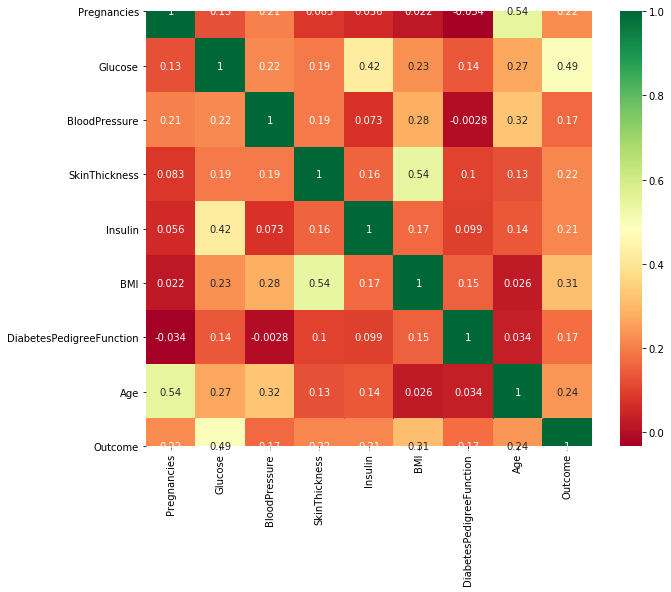

In [11]:
plt.figure(figsize=(10,8))
p = sns.heatmap(diabetes_df2.corr(), annot=True, cmap='RdYlGn')

### Scaling the data

* Many distance based algorithms like KNN are more effective when data attributes have the same scale. <br/>(features with greater range can overshadow other features and impact performance of the model)
* <b>Normalization</b> typically means rescales the values into a range of [0,1]. 
* <b>Standardization</b> typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

* data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:
<img src="https://cdn-images-1.medium.com/max/800/0*PXGPVYIxyI_IEHP7." width="200px" />

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
diabetes_norm =  pd.DataFrame(sc_X.fit_transform(diabetes_df2.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [13]:
diabetes_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


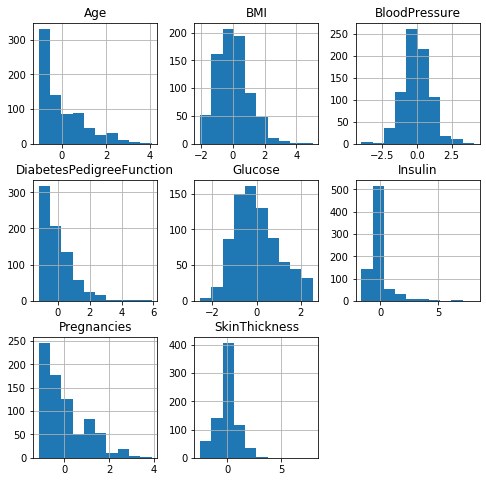

In [14]:
#check distributions again
p = diabetes_norm.hist(figsize=(8,8))

## Test Train Split and Cross Validation methods

* Cross validation methods
<img src="https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png" width="500px" />

In [15]:
X = diabetes_norm
y = diabetes_df2["Outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, stratify=y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [17]:
# score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v==max_train_score]
print('Max train score {}% and k={}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0% and k=[1]


In [19]:
# score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v==max_test_score]
print('Max test score {}% and k={}'.format(max_test_score*100, list(map(lambda x:x+1, test_scores_ind))))

Max test score 76.171875% and k=[3]


### Result Visualisation

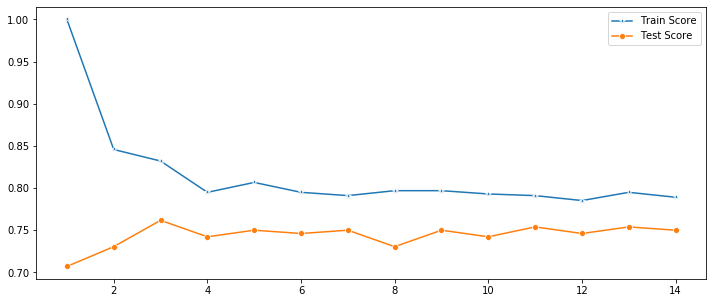

In [20]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15), train_scores, marker='*', label='Train Score')
p = sns.lineplot(range(1,15), test_scores, marker='o', label='Test Score')

### The best test result is when k=11

In [21]:
#set a knn-classifier with k=11
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.75390625

## Model Performance Analysis

### 1. Confusion Matrix
The confusion matrix is a technique used for summarizing the performance of a classification algorithm where it has binary outputs.
<img src="https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg" width="500px" />

In [24]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,144,23,167
1,40,49,89
All,184,72,256


Text(0.5, 15.0, 'Predicted label')

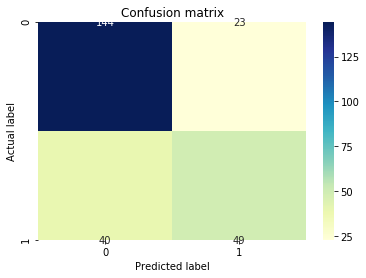

In [25]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### classification_report
-> precision, recall(sensitivity), and f1-score

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       167
           1       0.68      0.55      0.61        89

    accuracy                           0.75       256
   macro avg       0.73      0.71      0.71       256
weighted avg       0.75      0.75      0.75       256



### 2. ROC-AUC

In [27]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

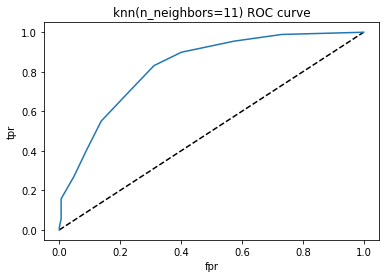

In [28]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'knn')
plt.title('knn(n_neighbors=11) ROC curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [29]:
#area under ROC curve(AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.8241606674291866

### Hyper Parameter Optimization
Grid Search is an approach to hyperparameter tuning that builds and evaluates a model for each combination of algorithm parameters.

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

print('Best Score: ' + str(knn_cv.best_score_))
print('Best Parameter: ' + str(knn_cv.best_params_))

Best Score: 0.7747395833333334
Best Parameter: {'n_neighbors': 25}
